In [36]:
from invertedIndex import InvertedIndex, FullDocuments
import random
import string
import time
import matplotlib.pyplot as plt

In [37]:

def generate_documents(num_words, num_documents):
    words = [''.join(random.choices(string.ascii_lowercase, k=5)) for _ in range(1000)] 
    documents = []
    for _ in range(num_documents):
        doc_length = random.randint(1, num_words // num_documents)  
        documents.append(random.choices(words, k=doc_length))
    return documents


def measure_average_time(func, repetitions, *args, **kwargs):
    times = []
    for _ in range(repetitions):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        times.append(end - start)
    return sum(times) / repetitions


doc_sizes = [100, 1000, 10000, 100000, 10**6, 10**7]
repetitions = 100


In [38]:

result_search_word = {}

for size in doc_sizes:
    print(f"\nTesting with total words: {size}")
    num_docs = 10  
    documents = generate_documents(size, num_docs)

    # Создаем инстансы
    index = InvertedIndex()
    full_docs = FullDocuments()

    for i, doc in enumerate(documents, start=1):
        index.insert(doc)
        full_docs.add_document(i, doc)

    word_to_search = random.choice(documents[random.randint(0,num_docs-1)])
    avg_time_index = measure_average_time(index.search_word, repetitions, word_to_search)
    avg_time_full = measure_average_time(full_docs.search_word, repetitions, word_to_search)

    result_search_word[size] = {
        "InvertedIndex": avg_time_index,
        "FullDocuments": avg_time_full,
    }

    print(f"InvertedIndex search word average time: {avg_time_index:.9f} seconds.")
    print(f"FullDocuments search word average time: {avg_time_full:.9f} seconds.")



Testing with total words: 100
InvertedIndex search word average time: 0.000001194 seconds.
FullDocuments search word average time: 0.000008154 seconds.

Testing with total words: 1000
InvertedIndex search word average time: 0.000001297 seconds.
FullDocuments search word average time: 0.000042858 seconds.

Testing with total words: 10000
InvertedIndex search word average time: 0.000000470 seconds.
FullDocuments search word average time: 0.000299103 seconds.

Testing with total words: 100000
InvertedIndex search word average time: 0.000001297 seconds.
FullDocuments search word average time: 0.001671000 seconds.

Testing with total words: 1000000
InvertedIndex search word average time: 0.000000529 seconds.
FullDocuments search word average time: 0.024184761 seconds.

Testing with total words: 10000000
InvertedIndex search word average time: 0.000000556 seconds.
FullDocuments search word average time: 0.388479588 seconds.


In [39]:

result_search_range = {}

for size in doc_sizes:
    print(f"\nTesting with total words: {size}")
    num_docs = 10  
    documents = generate_documents(size, num_docs)

    index = InvertedIndex()
    full_docs = FullDocuments()

    for i, doc in enumerate(documents, start=1):
        index.insert(doc)
        full_docs.add_document(i, doc)

    word_to_search_1 = random.choice(documents[random.randint(0,num_docs-1)])  
    word_to_search_2 = random.choice(documents[random.randint(0,num_docs-1)])  
    
    avg_time_index = measure_average_time(index.search_range, repetitions, word_to_search_1, word_to_search_2)
    avg_time_full = measure_average_time(full_docs.search_range, repetitions, word_to_search_1, word_to_search_2)

    result_search_range[size] = {
        "InvertedIndex": avg_time_index,
        "FullDocuments": avg_time_full,
    }

    print(f"InvertedIndex search range average time: {avg_time_index:.9f} seconds.")
    print(f"FullDocuments search range average time: {avg_time_full:.9f} seconds.")


Testing with total words: 100
InvertedIndex search range average time: 0.000006328 seconds.
FullDocuments search range average time: 0.000010376 seconds.

Testing with total words: 1000
InvertedIndex search range average time: 0.000020549 seconds.
FullDocuments search range average time: 0.000111437 seconds.

Testing with total words: 10000
InvertedIndex search range average time: 0.000053034 seconds.
FullDocuments search range average time: 0.000779376 seconds.

Testing with total words: 100000
InvertedIndex search range average time: 0.000171824 seconds.
FullDocuments search range average time: 0.004989970 seconds.

Testing with total words: 1000000
InvertedIndex search range average time: 0.000053339 seconds.
FullDocuments search range average time: 0.051812227 seconds.

Testing with total words: 10000000
InvertedIndex search range average time: 0.000179353 seconds.
FullDocuments search range average time: 0.535270996 seconds.


In [40]:
result_search_distance = {}

for size in doc_sizes:
    print(f"\nTesting with total words: {size}")
    num_docs = 10  
    documents = generate_documents(size, num_docs)

    index = InvertedIndex()
    full_docs = FullDocuments()

    for i, doc in enumerate(documents, start=1):
        index.insert(doc)
        full_docs.add_document(i, doc)

    word_to_search_1 = random.choice(documents[random.randint(0,num_docs-1)])  
    word_to_search_2 = random.choice(documents[random.randint(0,num_docs-1)])  
    dist = random.randint(0,num_docs-1)

    avg_time_index = measure_average_time(index.search_distance, repetitions, word_to_search_1, word_to_search_2, dist)
    avg_time_full = measure_average_time(full_docs.search_distance, repetitions, word_to_search_1, word_to_search_2, dist)

    result_search_distance[size] = {
        "InvertedIndex": avg_time_index,
        "FullDocuments": avg_time_full,
    }

    print(f"InvertedIndex search range average time: {avg_time_index:.9f} seconds.")
    print(f"FullDocuments search range average time: {avg_time_full:.9f} seconds.")


Testing with total words: 100
InvertedIndex search range average time: 0.000000634 seconds.
FullDocuments search range average time: 0.000017431 seconds.

Testing with total words: 1000
InvertedIndex search range average time: 0.000000618 seconds.
FullDocuments search range average time: 0.000069249 seconds.

Testing with total words: 10000
InvertedIndex search range average time: 0.000001888 seconds.
FullDocuments search range average time: 0.000522113 seconds.

Testing with total words: 100000
InvertedIndex search range average time: 0.000019469 seconds.
FullDocuments search range average time: 0.004718444 seconds.

Testing with total words: 1000000
InvertedIndex search range average time: 0.003211033 seconds.
FullDocuments search range average time: 0.084267859 seconds.

Testing with total words: 10000000
InvertedIndex search range average time: 0.117770994 seconds.
FullDocuments search range average time: 1.022958512 seconds.


In [41]:
def plot_results(result_dict, title, ax):
    sizes = list(result_dict.keys())
    inverted_times = [result_dict[size]['InvertedIndex'] for size in sizes]
    full_times = [result_dict[size]['FullDocuments'] for size in sizes]

    ax.plot(sizes, inverted_times, label='InvertedIndex', marker='o')
    ax.plot(sizes, full_times, label='FullDocuments', marker='o')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel('Total Words')
    ax.set_ylabel('Average Time (s)')
    ax.legend()
    ax.grid(True, which="both", linestyle='--', linewidth=0.5)

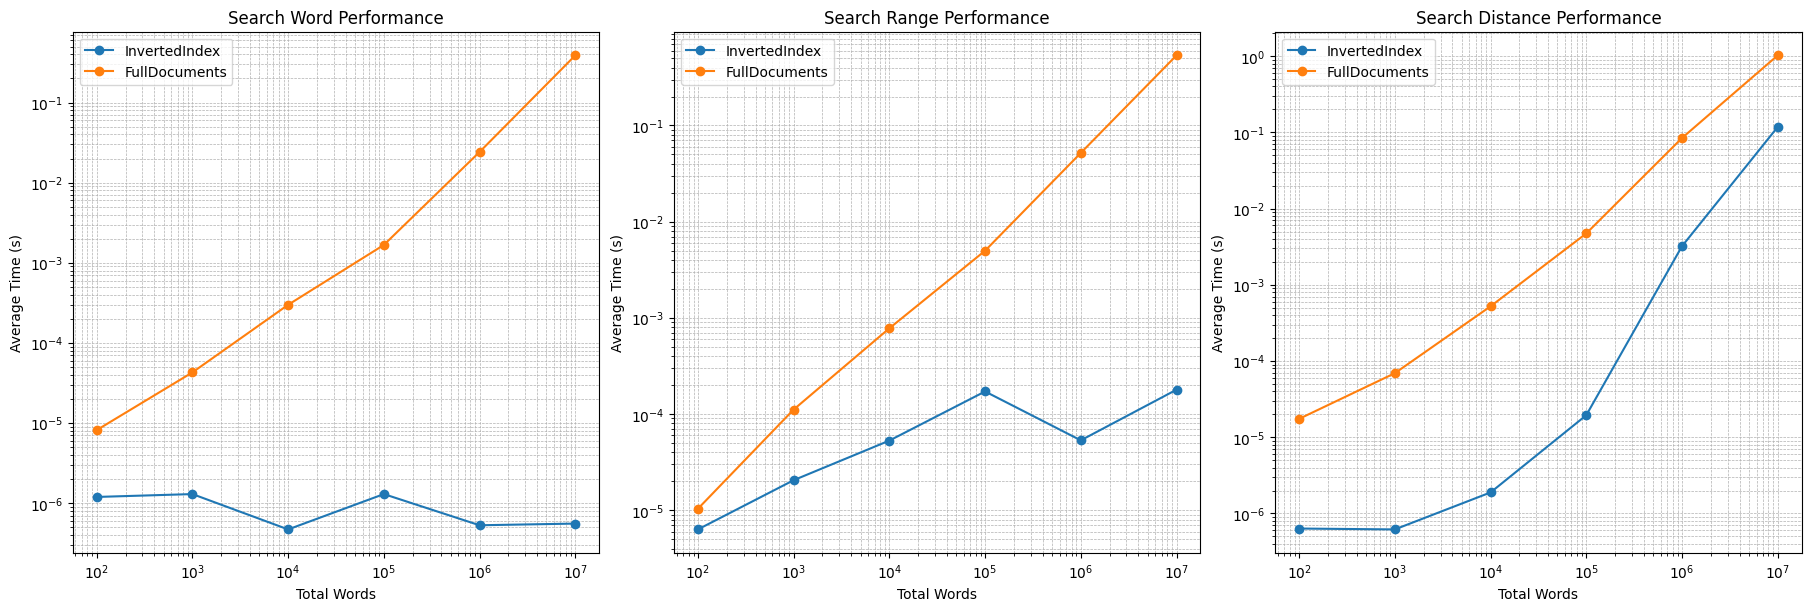

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
plot_results(result_search_word, "Search Word Performance", axes[0])
plot_results(result_search_range, "Search Range Performance", axes[1])
plot_results(result_search_distance, "Search Distance Performance", axes[2])
plt.show()